# Exploratory Data Analysis (EDA)

This program will demonstrate the exploration of G&T student data from 2017-2018.

## Step 1: Toolkits for EDA with Python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection
import warnings
warnings.filterwarnings('ignore')

## Step 2: Importing Data and Reading Dataset

In [5]:
df = pd.read_csv(r'G&T Results 2017-18 (Responses) - Form Responses 1.csv')

df

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,4/8/2017 6:44:01,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,4/7/2017 10:40:45,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,4/7/2017 10:41:56,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,4/7/2017 10:43:31,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,4/10/2017 10:18:34,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe
...,...,...,...,...,...,...,...,...,...,...,...,...
112,6/20/2017 16:06:54,1,2.0,August,30,99,44,99,99,"Lower Lab, Anderson, PS 11, NEST + m, Ps 33",Lower lab (off waitlist),Yes
113,6/21/2017 22:52:59,K,20.0,July,97,97,97,99,98,PS229,Ps205,Yes
114,9/14/2017 16:39:55,K,32.0,February,26,99,40,99,99,NaN,NaN,Maybe
115,11/19/2017 17:07:05,K,4.0,April,19,84,33,95,91,Ps 102,Ps102,Yes


```df.info()``` can be used to see how much data is not empty (Non-Null Count) and the data type of a column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   117 non-null    object 
 1   Entering Grade Level        117 non-null    object 
 2   District                    101 non-null    float64
 3   Birth Month                 117 non-null    object 
 4   OLSAT Verbal Score          117 non-null    object 
 5   OLSAT Verbal Percentile     117 non-null    object 
 6   NNAT Non Verbal Raw Score   117 non-null    object 
 7   NNAT Non Verbal Percentile  117 non-null    int64  
 8   Overall Score               117 non-null    int64  
 9   School Preferences          75 non-null     object 
 10  School Assigned             29 non-null     object 
 11  Will you enroll there?      71 non-null     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 11.1+ KB


## Step 3: Analyzing the Data

### Basic Data Inspection
To do a basic inspection, the things you need to find out are:
* Data size (rows and columns)
* Multiple rows of data (usually a start and end row)
* Data types and info (non-empty data)

This information can be obtained by using ```df.info()``` and showing `df`

### Basic Statistical Summary

The statistical summary of a data can be provided using ```df.describe()```

In [10]:
df.describe()

,District,NNAT Non Verbal Percentile,Overall Score
count,101.000000,117.000000,117.000000
mean,12.504950,98.632479,97.564103
std,11.406686,1.393323,2.798967
min,1.000000,90.000000,76.000000
25%,2.000000,99.000000,97.000000
50%,3.000000,99.000000,99.000000
75%,25.000000,99.000000,99.000000
max,32.000000,99.000000,99.000000


Only the District, NNAT Non Verbal Percentile, and Overall Score columns from the table above produce descriptive statistical values. This is reasonable considering that the data types other than the three columns are objects, not floats or ints. Therefore, several columns need to be converted into numeric data first before continuing the analysis.

## Step 4: Duplication and Missing Values Management

### Handling Duplications:
To remove two identical rows, you can use ```df.duplicate()``` and ```df.drop_duplicates```

In [13]:
# Get duplicates
duplicates = df.duplicated()
#Remove Duplicates
df_drop = df.drop_duplicates
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
112    False
113    False
114    False
115    False
116    False
Length: 117, dtype: bool

In [14]:
df_drop

<bound method DataFrame.drop_duplicates of                Timestamp Entering Grade Level  District Birth Month  \
0       4/8/2017 6:44:01                    1       6.0   September   
1      4/7/2017 10:40:45                    K       NaN      August   
2      4/7/2017 10:41:56                    1       NaN       March   
3      4/7/2017 10:43:31                    K       NaN   September   
4     4/10/2017 10:18:34                    K      22.0       April   
..                   ...                  ...       ...         ...   
112   6/20/2017 16:06:54                    1       2.0      August   
113   6/21/2017 22:52:59                    K      20.0        July   
114   9/14/2017 16:39:55                    K      32.0    February   
115  11/19/2017 17:07:05                    K       4.0       April   
116   1/11/2019 15:03:41                    K       2.0     January   

    OLSAT Verbal Score OLSAT Verbal Percentile NNAT Non Verbal Raw Score  \
0                   28      

From the duplication analysis, it can be seen that no two rows have exactly the same values.

### Managing Missing Values

To check for empty values, use ```isnull()``` combined with ```sum()``` to check how much data is empty.

In [17]:
missing_values = df.isnull().sum()
missing_values

Timestamp                      0
Entering Grade Level           0
District                      16
Birth Month                    0
OLSAT Verbal Score             0
OLSAT Verbal Percentile        0
NNAT Non Verbal Raw Score      0
NNAT Non Verbal Percentile     0
Overall Score                  0
School Preferences            42
School Assigned               88
Will you enroll there?        46
dtype: int64

Here, we can see that the missing data is in the "District", "School Preferences", "School Assigned", and "Will you enroll there?" columns. This type of data can be removed by removing the rows or columns that contain blank values. In this case, we will remove the columns that contain missing data using ```df.drop()```. This method can be used if we are not looking for a relationship with the variables that contain missing values. If we want to see the relationship between all variables, use ```dropna()``` to remove the missing data.

In [19]:
df = df.drop(['Timestamp', 'District', 'School Preferences', 'School Assigned', 'Will you enroll there?'], axis = 1)
df

,Entering Grade Level,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score
0,1,September,28,99,45,99,99
1,K,August,25,99,39,99,99
2,1,March,27,96,42,99,98
3,K,September,23,97,40,99,98
4,K,April,25,98,38,99,99
...,...,...,...,...,...,...,...
112,1,August,30,99,44,99,99
113,K,July,97,97,97,99,98
114,K,February,26,99,40,99,99
115,K,April,19,84,33,95,91


## Step 5: Data Reduction

In this step, data that is deemed unnecessary will be removed. One of the data points that can be removed is the data in the "Birth Month" column. Removing this column can be done by using ```df.drop()```

In [21]:
df = df.drop(['Birth Month'], axis = 1)
df

,Entering Grade Level,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score
0,1,28,99,45,99,99
1,K,25,99,39,99,99
2,1,27,96,42,99,98
3,K,23,97,40,99,98
4,K,25,98,38,99,99
...,...,...,...,...,...,...
112,1,30,99,44,99,99
113,K,97,97,97,99,98
114,K,26,99,40,99,99
115,K,19,84,33,95,91


Note that the domain knowldege, the objective of your analysis, and statistical measures are important when deciding what data that can be reduced.

## Step 6: Feature Engineering

In this section, a new feature will be defined, which is a function of the raw data. Several features can be defined from this data. The first thing that can be derived from this data is the __entry age__. This feature is derived from the "Entering Grade Level" column with the following assumptions:
* Students from Kindergarten (K) level aged 5 years
* Students from Grade 1 are 6 years old
* Students from Grade 2 are 7 years old

The entry age for Grade 3 to Grade 12 students follows a similar pattern. The code snippet below creates an "Age" column.

In [24]:
df["Age"] = df["Entering Grade Level"]

n = df.shape[0]
for i in range(n):
    df["Age"][i] = int(5) if df["Age"][i] == 'K' else int(df["Age"][i]) + 5

df["Age"] = df["Age"].astype(int)

Note that the percentiles in this data can be derived from existing scores. However, they are only derived exactly from the scores when the score data is complete. Therefore, the percentile data will be left as is for now.

## Step 7: Creating Features

The difference between Step 7 and Step 6 is that the new feature is a function of several data points, not just one data point. However, the author has not found a new feature that is a function of two or more data points. Even so, there is a possibility that we will return to Step 7 (or previous steps) if a new feature comes to mind. This is the principle that needs to be instilled when exploring data. We can repeat the steps in this step several times until we get additional information related to the data.

## Step 8: Data Cleaning/Wrangling

### Key Aspects of Data Cleaning/Wrangling:
* Handling Inconsistent Data
* Data Type Conversion
* Handling Missing Data
* Renaming and Reordering Columns

A few things can be done to clean this specific data:
* Note that some data points in the column "OLSAT Verbal Score" and "NNAT Non Verbal Raw Score" are bigger than the maximum possible score (48 for NNAT Non Verbal and 30 for "OLSAT Verbal Score"). There are also data points that not consistent (such as 24/30).
* Besides "NNAT Nonverbal Percentile" and "Overall Score," the rest of the columns contain numerical data as an object datatype, which means that they need to be converted.

In [28]:
for x in df.index:
    if len(df.loc[x, "OLSAT Verbal Score"]) > 2:
        str = df.loc[x, "OLSAT Verbal Score"] 
        df.loc[x, "OLSAT Verbal Score"] = str[0] + str[1]
    p = df.loc[x, "OLSAT Verbal Score"]
    try:
        if int(p) <= 30:
            df.loc[x, "OLSAT Verbal Score"] = int(p)
        else:
            df.drop(x, inplace = True)
    except:
        df.drop(x, inplace = True)
        
df["OLSAT Verbal Score"] = df["OLSAT Verbal Score"].astype(int)

In [29]:
for x in df.index:
    if len(df.loc[x, "NNAT Non Verbal Raw Score"]) > 2:
        str = df.loc[x, "NNAT Non Verbal Raw Score"] 
        df.loc[x, "NNAT Non Verbal Raw Score"] = str[0] + str[1]
    p = df.loc[x, "NNAT Non Verbal Raw Score"]
    try:
        if int(p) <= 48:
            df.loc[x, "NNAT Non Verbal Raw Score"] = int(p)
        else:
            df.drop(x, inplace = True)
    except:
        df.drop(x, inplace = True)

df["NNAT Non Verbal Raw Score"] = df["NNAT Non Verbal Raw Score"].astype(int)

In [30]:
df['OLSAT Verbal Percentile'] = df['OLSAT Verbal Percentile'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 116
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Entering Grade Level        107 non-null    object
 1   OLSAT Verbal Score          107 non-null    int32 
 2   OLSAT Verbal Percentile     107 non-null    int32 
 3   NNAT Non Verbal Raw Score   107 non-null    int32 
 4   NNAT Non Verbal Percentile  107 non-null    int64 
 5   Overall Score               107 non-null    int64 
 6   Age                         107 non-null    int32 
dtypes: int32(4), int64(2), object(1)
memory usage: 9.1+ KB


## Step 9: EDA — Exploratory Data Analysis

### Key Components of EDA:
* Descriptive Statistics
* Data Visualization
* Correlation Analysis
* Outlier Detection

In [32]:
df

,Entering Grade Level,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,Age
0,1,28,99,45,99,99,6
1,K,25,99,39,99,99,5
2,1,27,96,42,99,98,6
3,K,23,97,40,99,98,5
4,K,25,98,38,99,99,5
...,...,...,...,...,...,...,...
110,K,24,96,45,99,98,5
112,1,30,99,44,99,99,6
114,K,26,99,40,99,99,5
115,K,19,84,33,95,91,5


In [33]:
# Describe Data
df.describe()

,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,Age
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,25.074766,94.981308,40.981308,98.700935,97.663551,5.457944
std,3.335631,7.080376,3.771745,1.183335,2.770954,0.704171
min,13.000000,55.000000,27.000000,90.000000,76.000000,5.000000
25%,23.000000,96.000000,39.000000,99.000000,98.000000,5.000000
50%,25.000000,98.000000,41.000000,99.000000,99.000000,5.000000
75%,28.000000,99.000000,44.000000,99.000000,99.000000,6.000000
max,30.000000,99.000000,48.000000,99.000000,99.000000,8.000000


<Axes: xlabel='Overall Score', ylabel='Count'>

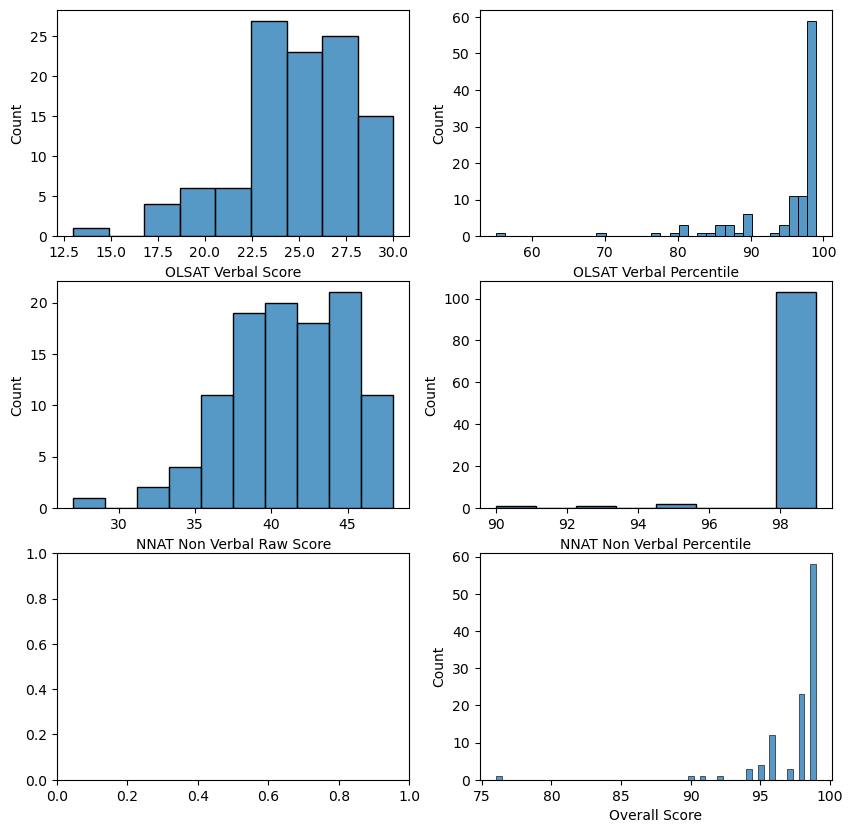

In [34]:
# Basic Data visualization
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
sns.histplot(df['OLSAT Verbal Score'], ax=axes[0, 0])
sns.histplot(df['OLSAT Verbal Percentile'], ax=axes[0, 1])
sns.histplot(df['NNAT Non Verbal Raw Score'], ax=axes[1, 0])
sns.histplot(df['NNAT Non Verbal Percentile'], ax=axes[1, 1])
sns.histplot(df['Overall Score'], ax=axes[2, 1])

<Axes: xlabel='NNAT Non Verbal Raw Score', ylabel='NNAT Non Verbal Percentile'>

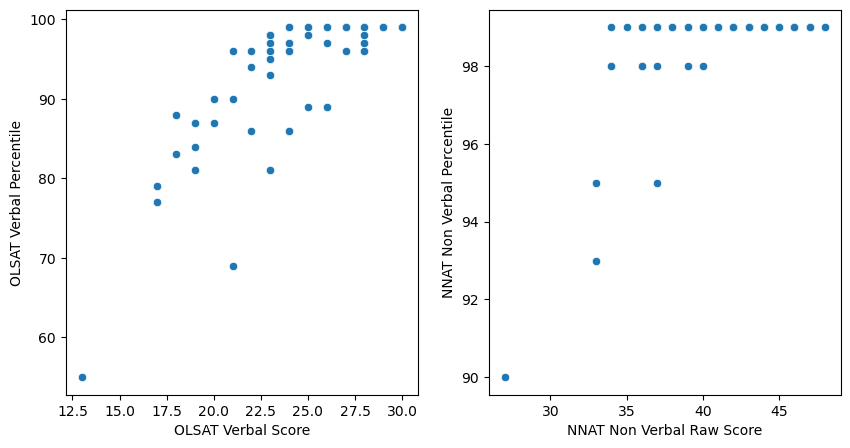

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='OLSAT Verbal Score', y='OLSAT Verbal Percentile', data=df, ax=axes[0])
sns.scatterplot(x='NNAT Non Verbal Raw Score', y='NNAT Non Verbal Percentile', data=df, ax=axes[1])

Note that the scatterplot is preferred when you know that there is a relation between two columns.

<Axes: >

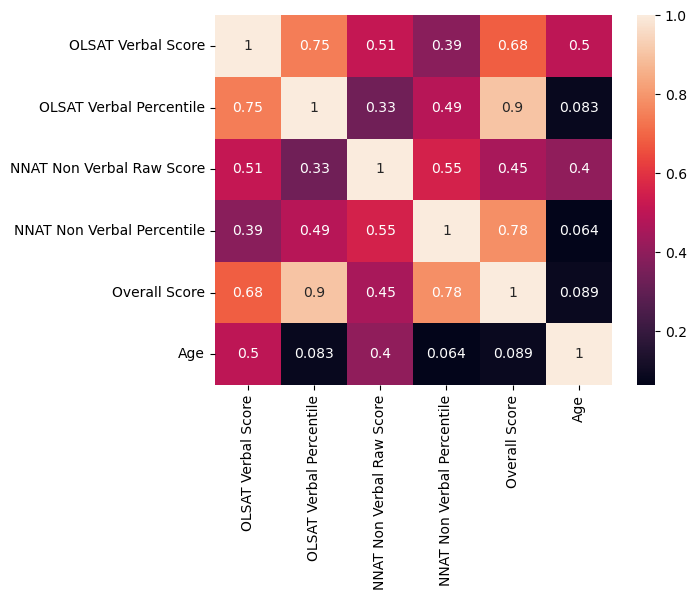

In [37]:
# Find correlations
sns.heatmap(df.corr(), annot=True)

<Axes: >

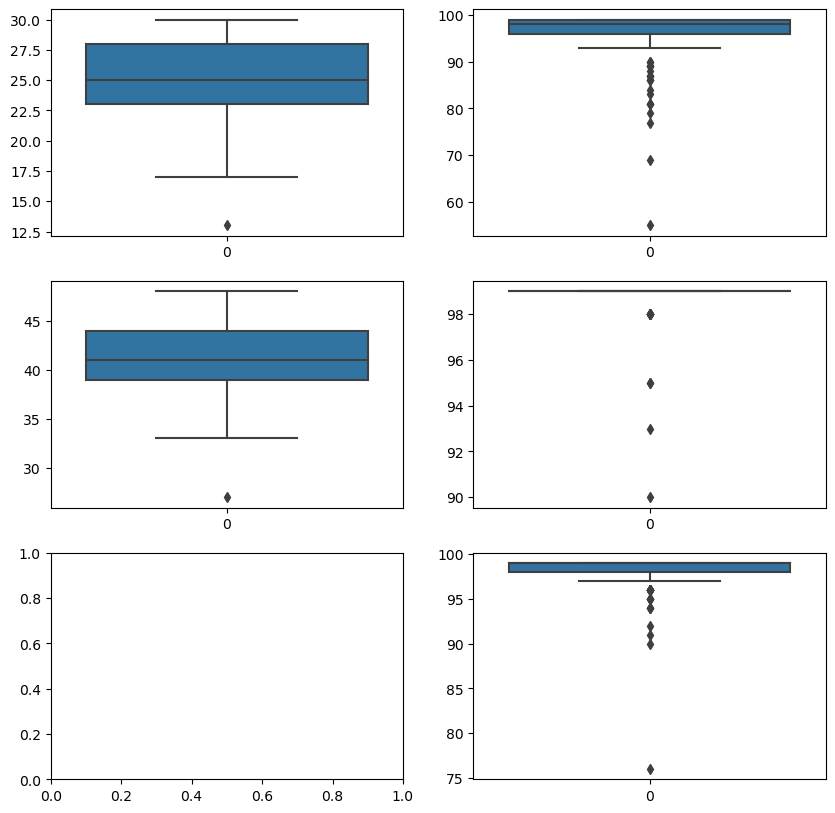

In [38]:
# Detect outliers
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
sns.boxplot(df['OLSAT Verbal Score'], ax=axes[0, 0])
sns.boxplot(df['OLSAT Verbal Percentile'], ax=axes[0, 1])
sns.boxplot(df['NNAT Non Verbal Raw Score'], ax=axes[1, 0])
sns.boxplot(df['NNAT Non Verbal Percentile'], ax=axes[1, 1])
sns.boxplot(df['Overall Score'], ax=axes[2, 1])

## Step 10: Statistics Summary

### Key Statistical Measures:

* Descriptive Statistic (Done using ```describe()```)
* Central Tendency

In [40]:
mean_val = df.mean()
median_val = df.median()
mode_val = df.mode()

mean_val, median_val

(OLSAT Verbal Score            25.074766
 OLSAT Verbal Percentile       94.981308
 NNAT Non Verbal Raw Score     40.981308
 NNAT Non Verbal Percentile    98.700935
 Overall Score                 97.663551
 Age                            5.457944
 dtype: float64,
 OLSAT Verbal Score            25.0
 OLSAT Verbal Percentile       98.0
 NNAT Non Verbal Raw Score     41.0
 NNAT Non Verbal Percentile    99.0
 Overall Score                 99.0
 Age                            5.0
 dtype: float64)

* Dispersion Measures

In [42]:
std_dev = df.std()
variance = df.var()
df_new = df.drop(['Entering Grade Level'], axis = 1)
range_val = df_new.max() - df_new.min()
iqr = df.quantile(0.75) - df.quantile(0.25)

std_dev, variance, range_val, iqr

(OLSAT Verbal Score            3.335631
 OLSAT Verbal Percentile       7.080376
 NNAT Non Verbal Raw Score     3.771745
 NNAT Non Verbal Percentile    1.183335
 Overall Score                 2.770954
 Age                           0.704171
 dtype: float64,
 OLSAT Verbal Score            11.126433
 OLSAT Verbal Percentile       50.131723
 NNAT Non Verbal Raw Score     14.226062
 NNAT Non Verbal Percentile     1.400282
 Overall Score                  7.678187
 Age                            0.495856
 dtype: float64,
 OLSAT Verbal Score            17
 OLSAT Verbal Percentile       44
 NNAT Non Verbal Raw Score     21
 NNAT Non Verbal Percentile     9
 Overall Score                 23
 Age                            3
 dtype: int64,
 OLSAT Verbal Score            5.0
 OLSAT Verbal Percentile       3.0
 NNAT Non Verbal Raw Score     5.0
 NNAT Non Verbal Percentile    0.0
 Overall Score                 1.0
 Age                           1.0
 dtype: float64)

* Skewness and Kurtosis

In [44]:
skewness = df.skew()
kurtosis = df.kurt()

skewness, kurtosis

(OLSAT Verbal Score           -0.891742
 OLSAT Verbal Percentile      -2.822685
 NNAT Non Verbal Raw Score    -0.562489
 NNAT Non Verbal Percentile   -5.488344
 Overall Score                -5.076351
 Age                           1.390820
 dtype: float64,
 OLSAT Verbal Score             0.886471
 OLSAT Verbal Percentile       10.357795
 NNAT Non Verbal Raw Score      0.678538
 NNAT Non Verbal Percentile    33.398378
 Overall Score                 35.475580
 Age                            1.120852
 dtype: float64)

## Step 11: EDA — Univariate Analysis

For categorical data, such as 'Entering Grade Level', there are few visual aid that can be used to describe the data

<Axes: xlabel='Entering Grade Level', ylabel='count'>

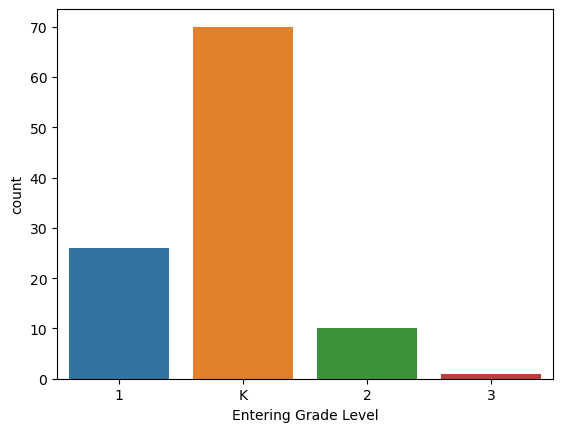

In [46]:
sns.countplot(x=df['Entering Grade Level'])

<Axes: ylabel='Entering Grade Level'>

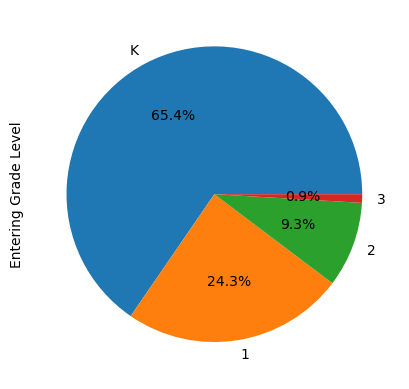

In [47]:
df['Entering Grade Level'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: >

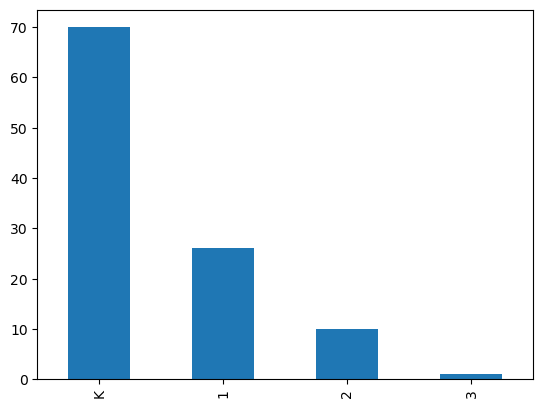

In [48]:
df['Entering Grade Level'].value_counts().plot.bar()

We will repeat previous steps for the student that enter from the kindergarten.

## Step 9: EDA — Exploratory Data Analysis

In [51]:
df_K = df[df['Entering Grade Level'] == 'K']
df_K = df_K.reset_index(drop=True)

In [52]:
# Describe Data
df_K.describe()

,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,Age
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,23.900000,94.971429,39.700000,98.614286,97.571429,5.0
std,3.279935,7.203001,3.656838,1.375699,3.187709,0.0
min,13.000000,55.000000,27.000000,90.000000,76.000000,5.0
25%,23.000000,96.000000,38.000000,99.000000,98.000000,5.0
50%,24.000000,98.000000,40.000000,99.000000,99.000000,5.0
75%,26.000000,99.000000,42.000000,99.000000,99.000000,5.0
max,30.000000,99.000000,46.000000,99.000000,99.000000,5.0


<Axes: xlabel='Overall Score', ylabel='Count'>

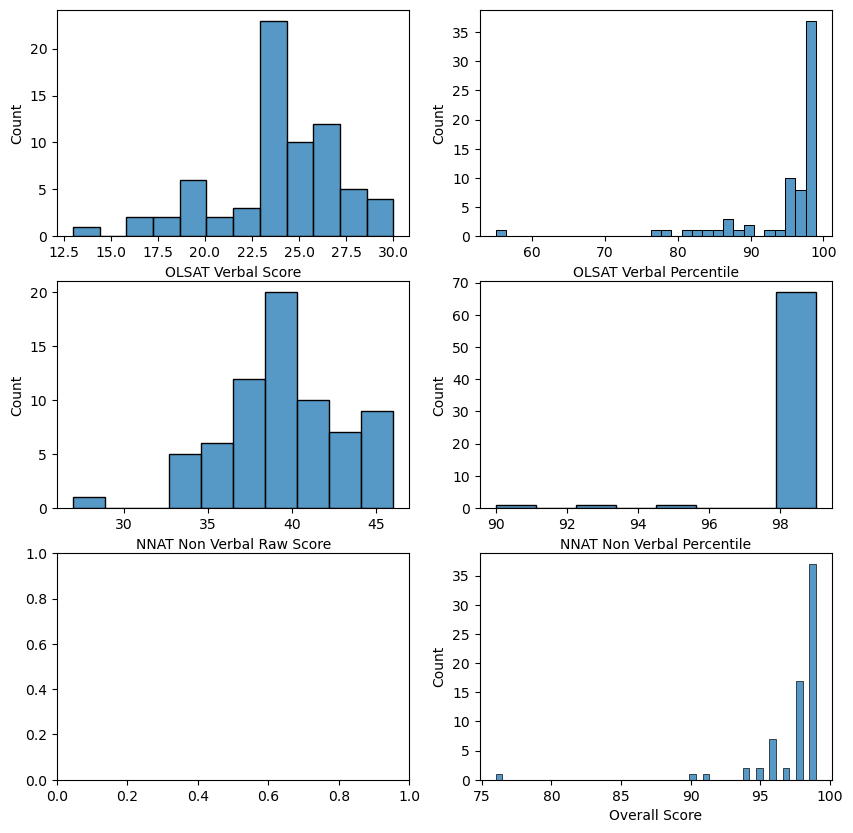

In [53]:
# Basic Data visualization
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
sns.histplot(df_K['OLSAT Verbal Score'], ax=axes[0, 0])
sns.histplot(df_K['OLSAT Verbal Percentile'], ax=axes[0, 1])
sns.histplot(df_K['NNAT Non Verbal Raw Score'], ax=axes[1, 0])
sns.histplot(df_K['NNAT Non Verbal Percentile'], ax=axes[1, 1])
sns.histplot(df_K['Overall Score'], ax=axes[2, 1])

<Axes: xlabel='NNAT Non Verbal Raw Score', ylabel='NNAT Non Verbal Percentile'>

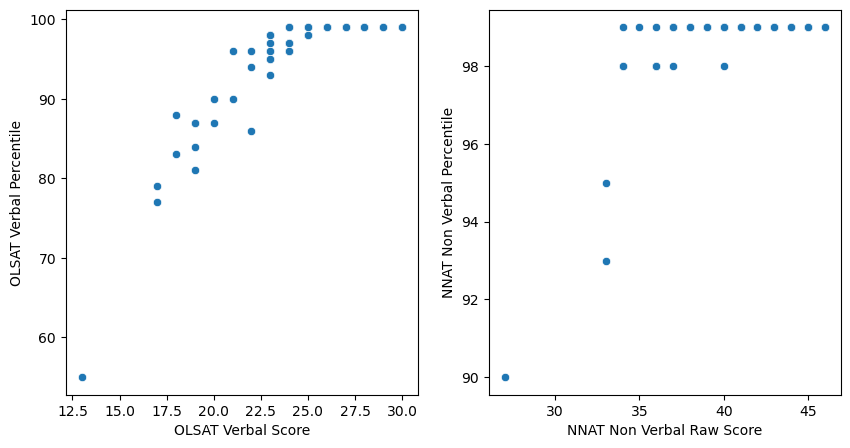

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='OLSAT Verbal Score', y='OLSAT Verbal Percentile', data=df_K, ax=axes[0])
sns.scatterplot(x='NNAT Non Verbal Raw Score', y='NNAT Non Verbal Percentile', data=df_K, ax=axes[1])

<Axes: >

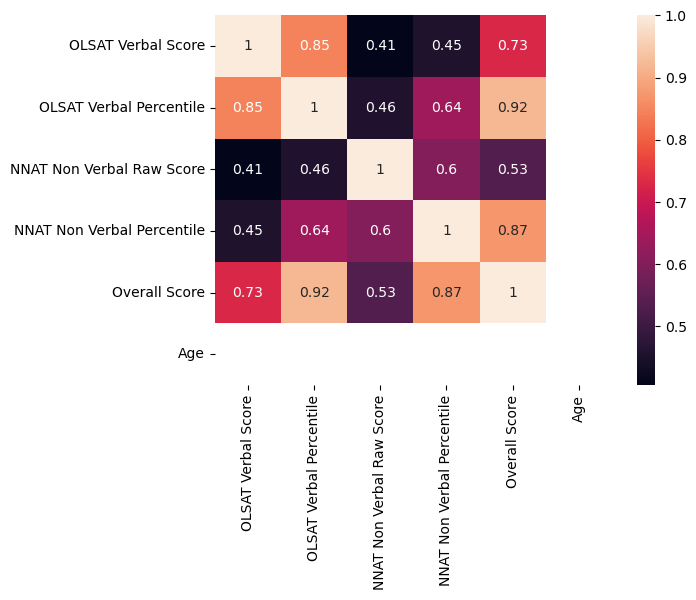

In [55]:
# Find correlations
sns.heatmap(df_K.corr(), annot=True)

<Axes: >

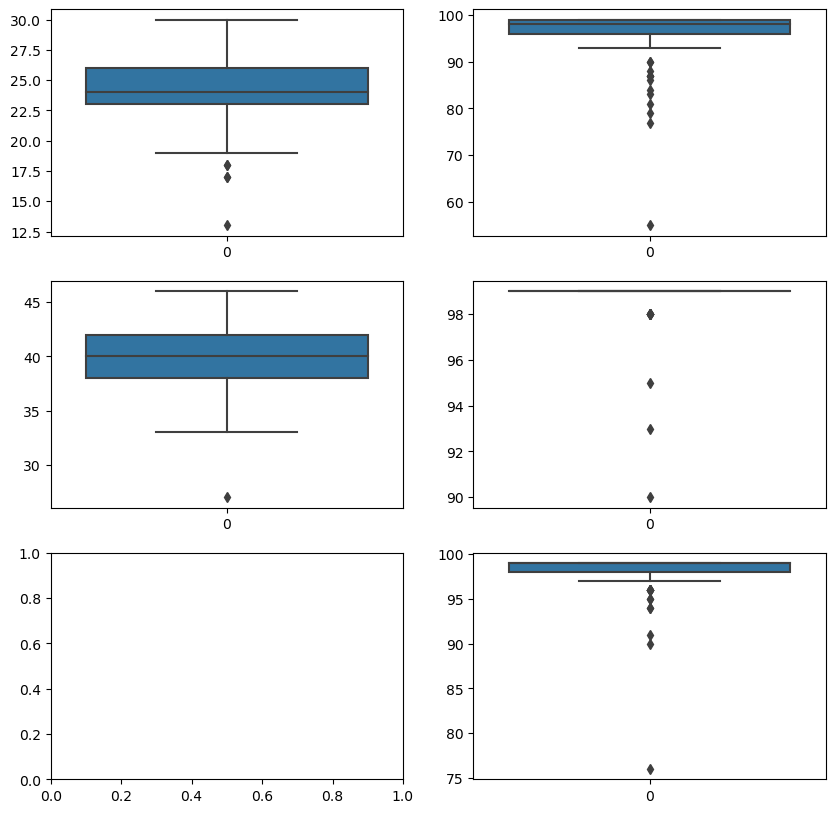

In [56]:
# Detect outliers
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
sns.boxplot(df_K['OLSAT Verbal Score'], ax=axes[0, 0])
sns.boxplot(df_K['OLSAT Verbal Percentile'], ax=axes[0, 1])
sns.boxplot(df_K['NNAT Non Verbal Raw Score'], ax=axes[1, 0])
sns.boxplot(df_K['NNAT Non Verbal Percentile'], ax=axes[1, 1])
sns.boxplot(df_K['Overall Score'], ax=axes[2, 1])


## Step 12: Data Transformation
Data Transformation involves modifying the data to a more suitable format or structure for analysis. This step can include normalization, scaling, or applying mathematical transformations.

## Step 13: EDA — Bivariate Analysis
Bivariate Analysis is about exploring the relationship between two different variables and understanding the correlation and patterns between them.

<Axes: xlabel='Entering Grade Level', ylabel='NNAT Non Verbal Raw Score'>

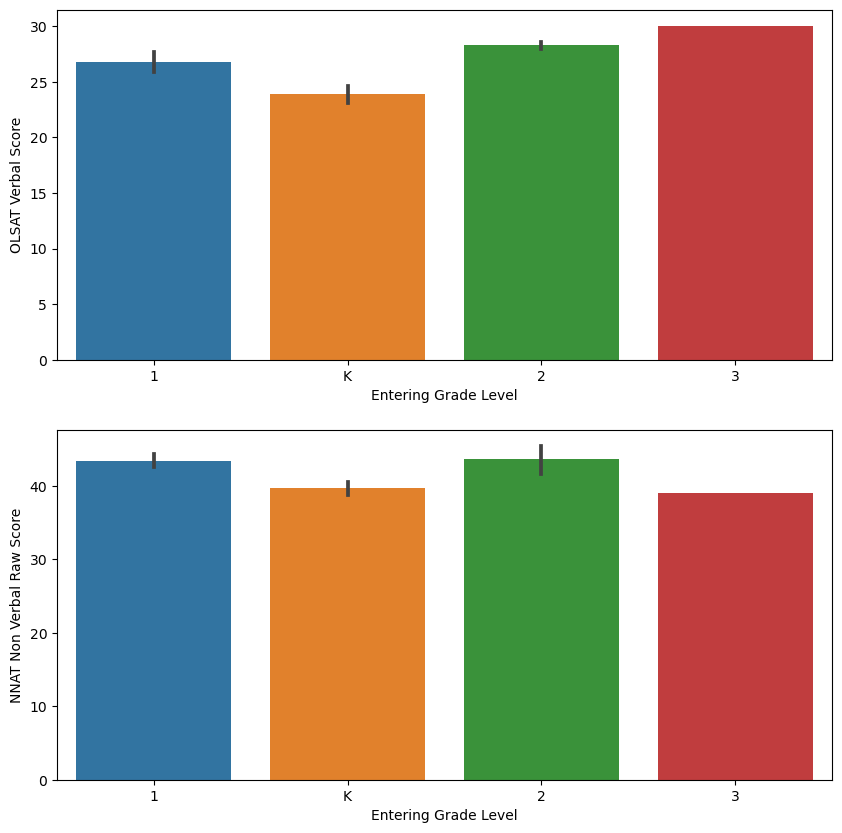

In [98]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.barplot(x='Entering Grade Level', y='OLSAT Verbal Score', data=df, ax = axes[0])
sns.barplot(x='Entering Grade Level', y='NNAT Non Verbal Raw Score', data=df, ax = axes[1])

## Step 14: EDA — Multivariate Analysis

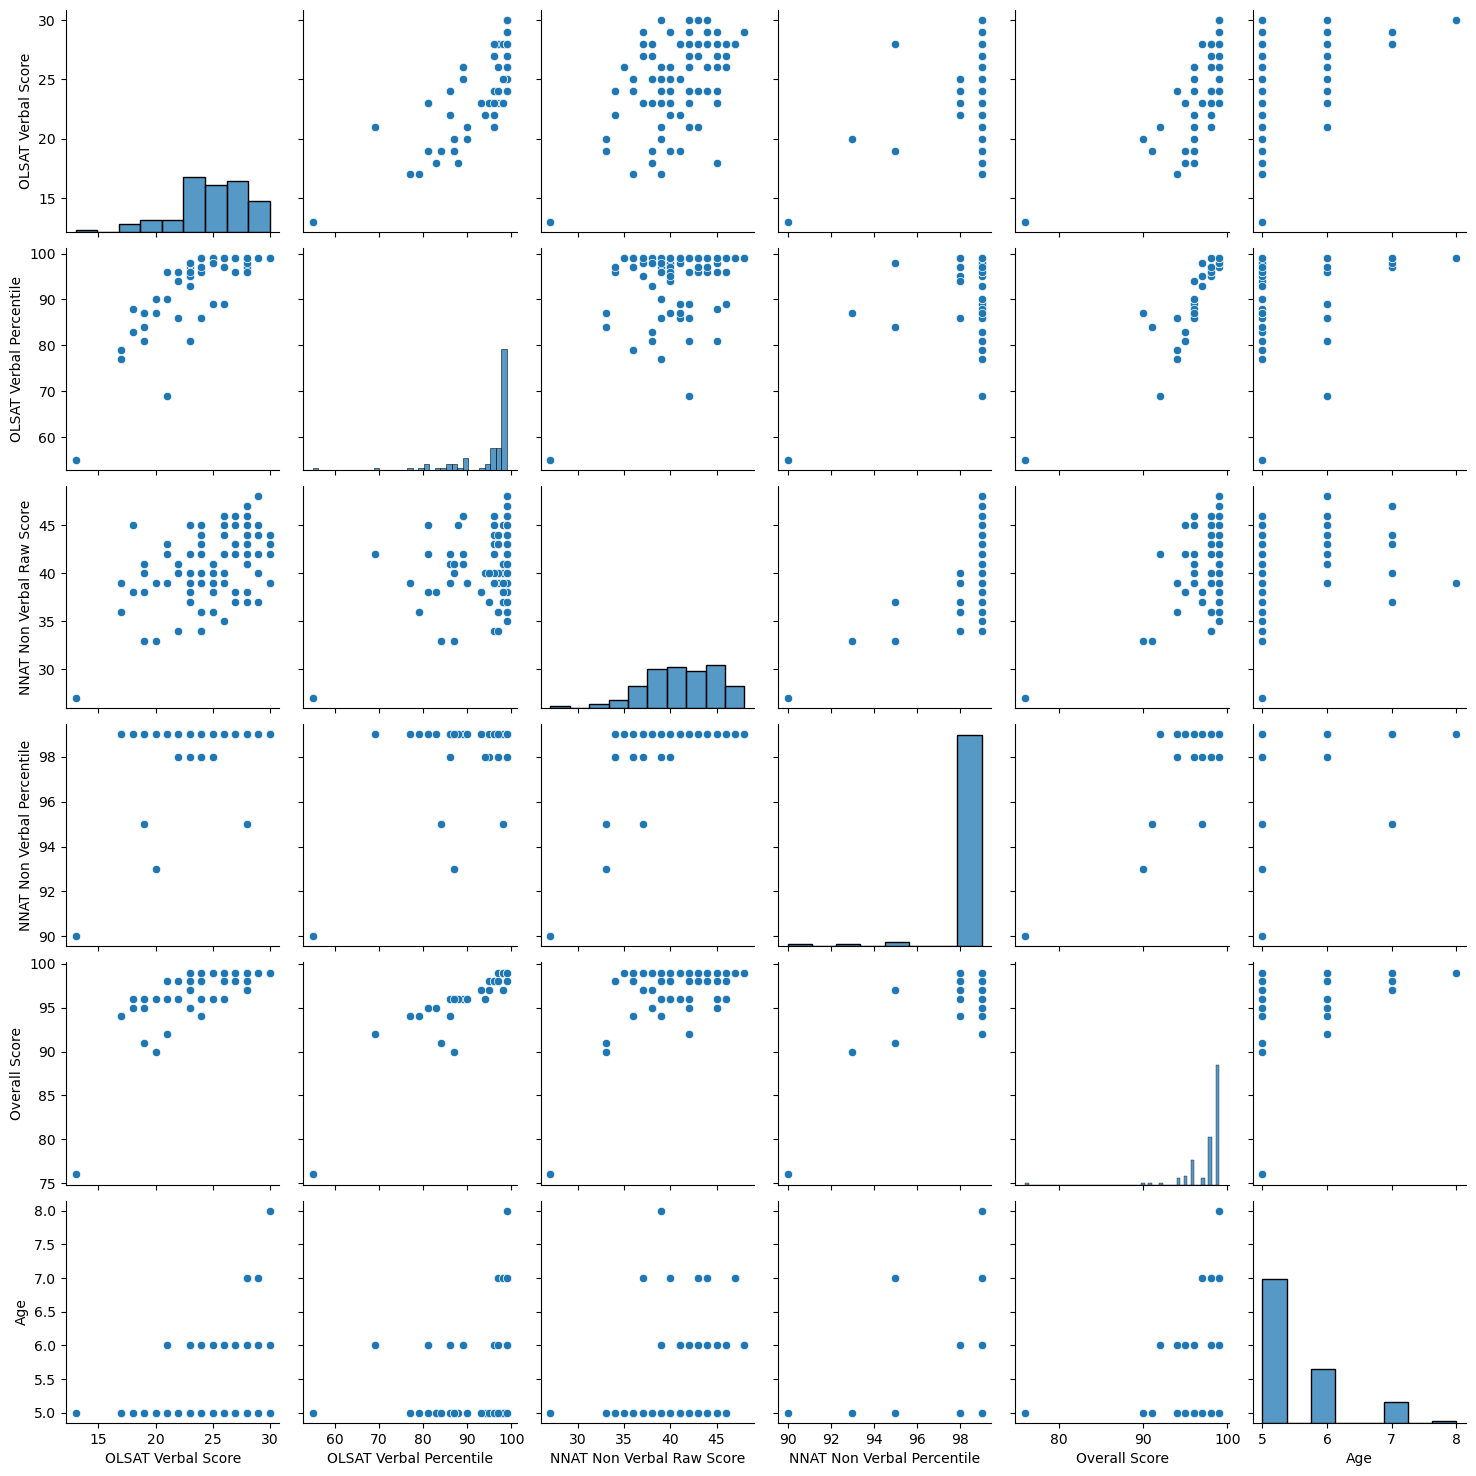

In [102]:
sns.pairplot(df)

## Step 15: Observing Data, Insights, and Storytelling

### Observation